# Collatz conjecture
see https://en.wikipedia.org/wiki/Collatz_conjecture

A minor rephrasing

In [2]:
import sys, math
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [16, 9]
pd.set_option('display.max_rows', 100)

In [4]:
def oddFromIdx(idx):
    return 2*idx -1
O = {}
for i in range(10):
    O[i] = [i+1, oddFromIdx(i+1)]
pd.DataFrame.from_dict(O, orient='index', columns=['idx', 'odd'] )

,idx,odd
0,1,1
1,2,3
2,3,5
3,4,7
4,5,9
5,6,11
6,7,13
7,8,15
8,9,17
9,10,19


In [5]:
# define an in and out edge for each integer.
def getLinks(i):
    if (i-1) % 3 == 0:
        bef = int((i-1) // 3)
        if (bef % 2) == 0:
            bef = int(2*i)
    else:
        bef = int(2*i)
    if i % 2 == 0:
        aft = int(i // 2)
    else:
        aft = int(3*i + 1)
    return bef, aft

In [6]:
def graph(N):
    edges = set([ ])
    for i in range(1, N+1, 1):
        a,z = getLinks(i)
        edges.add( (a, i) )
        edges.add( (i, z) )
    return edges

In [7]:
graph(5)

{(1, 4), (2, 1), (3, 10), (4, 2), (5, 16), (6, 3), (10, 5)}

In [8]:
D = {}
for i in range(1,65,1):
    bef, aft = getLinks(i)
    if bef == 2*(i):
        bef_1 = ""
        bef_2 = str(bef)
    else:
        bef_1 = str(bef)
        bef_2 = ""
    if aft == i/2:
        aft_1 = str(aft)
        aft_2 = ""
    else:
        aft_1 = ""
        aft_2 = str(aft)
    #
    _ , aft_aft = getLinks(aft)
    _ , aft_aft_aft = getLinks(aft_aft)
    D[i] = [bef_1, bef_2, "→", str(i), "→", aft_1, aft_2, "→", str(aft_aft), "→", str(aft_aft_aft)]

df = pd.DataFrame.from_dict(D, orient='index', columns=["bef_odd", "bef_even", "", "N", "", "aft_less", "aft_more", "", "...", "", "..."])
df

,bef_odd,bef_even,,N,,aft_less,aft_more,,...,,...
1,,2,→,1,→,,4,→,2,→,1
2,,4,→,2,→,1,,→,4,→,2
3,,6,→,3,→,,10,→,5,→,16
4,1,,→,4,→,2,,→,1,→,4
5,,10,→,5,→,,16,→,8,→,4
6,,12,→,6,→,3,,→,10,→,5
7,,14,→,7,→,,22,→,11,→,34
8,,16,→,8,→,4,,→,2,→,1
9,,18,→,9,→,,28,→,14,→,7
10,3,,→,10,→,5,,→,16,→,8


If we define:

O(i) : the ith odd integer ( O(1)=1, O(2)=3, ...)

Then we can see that the graph will always contain:

O(2j) → even → O(2j) + 2j

e.g.:

11 → 34 → 17

For the other odd numbers, the pattern will always look like:

O(2j-1) → even → even → O(2j) - (j-1)/2

e.g.:

O(5) →...→ O(5) - (5-1)/2  == O(4)

9 → 28 → 14 → 7

O(7) →...→ O(7) - (7-1)/2 == E(5)

13 → 40 → 20 → 10

# What we need to show
We only need to show that all sequences of O(2j) → ... → O(2j) + 2j → ... eventually generates either an even number or a O(2j+1) number.

e.g.:

11 → 34 → 17 → 52 → 26

15 → 46 → 23 → 70 → 35 → 106 → 53





In [9]:
# This function operates in O() function space which seems to have
# some advantages over dealing with the odd numbers directly.
#
# For instance, we see interesting patterns around O(2^n) that would
# would be messier to talk about as simple integers.

def genSeqOdd(L):
    while True:        
        prev_idx = L[-1]
        N = 2*prev_idx -1
        # Advance twice
        M = 3*N + 1
        M = M//2
        if (prev_idx %2 ) == 1:
            print(repr(L) + " because idx O(2j+1)")
            return
        elif M % 2 == 0:
            print(repr(L) + " because next Even")
            return
        else:
            odd_idx = (M+1)//2
            L.append(odd_idx)
            

In [10]:
genSeqOdd([6])

[6, 9] because idx O(2j+1)


In [11]:
genSeqOdd([8])

[8, 12, 18, 27] because idx O(2j+1)


In [12]:
genSeqOdd([10])

[10, 15] because idx O(2j+1)


In [13]:
genSeqOdd([5])

[5] because idx O(2j+1)


In [14]:
for i in range(28):
    genSeqOdd([2*i + 6])

[6, 9] because idx O(2j+1)
[8, 12, 18, 27] because idx O(2j+1)
[10, 15] because idx O(2j+1)
[12, 18, 27] because idx O(2j+1)
[14, 21] because idx O(2j+1)
[16, 24, 36, 54, 81] because idx O(2j+1)
[18, 27] because idx O(2j+1)
[20, 30, 45] because idx O(2j+1)
[22, 33] because idx O(2j+1)
[24, 36, 54, 81] because idx O(2j+1)
[26, 39] because idx O(2j+1)
[28, 42, 63] because idx O(2j+1)
[30, 45] because idx O(2j+1)
[32, 48, 72, 108, 162, 243] because idx O(2j+1)
[34, 51] because idx O(2j+1)
[36, 54, 81] because idx O(2j+1)
[38, 57] because idx O(2j+1)
[40, 60, 90, 135] because idx O(2j+1)
[42, 63] because idx O(2j+1)
[44, 66, 99] because idx O(2j+1)
[46, 69] because idx O(2j+1)
[48, 72, 108, 162, 243] because idx O(2j+1)
[50, 75] because idx O(2j+1)
[52, 78, 117] because idx O(2j+1)
[54, 81] because idx O(2j+1)
[56, 84, 126, 189] because idx O(2j+1)
[58, 87] because idx O(2j+1)
[60, 90, 135] because idx O(2j+1)


In [15]:
genSeqOdd([64])

[64, 96, 144, 216, 324, 486, 729] because idx O(2j+1)


In [16]:
genSeqOdd([128])

[128, 192, 288, 432, 648, 972, 1458, 2187] because idx O(2j+1)


In [17]:
genSeqOdd([256])

[256, 384, 576, 864, 1296, 1944, 2916, 4374, 6561] because idx O(2j+1)


In [18]:
genSeqOdd([256*256])

[65536, 98304, 147456, 221184, 331776, 497664, 746496, 1119744, 1679616, 2519424, 3779136, 5668704, 8503056, 12754584, 19131876, 28697814, 43046721] because idx O(2j+1)


In [19]:
len([65536, 98304, 147456, 221184, 331776, 497664, 746496, 1119744, 1679616, 2519424, 3779136, 5668704, 8503056, 12754584, 19131876, 28697814, 43046721])

17

In [20]:
genSeqOdd([65535])

[65535] because idx O(2j+1)


In [21]:
def delta(L):
    M = []
    n = len(L)
    for i in range(n-1):
        M.append(L[i+1] - L[i])
    return M

In [22]:
delta([64, 96, 144, 216, 324, 486, 729])

[32, 48, 72, 108, 162, 243]

In [23]:
delta([32, 48, 72, 108, 162, 243])

[16, 24, 36, 54, 81]

In [24]:
delta([16, 24, 36, 54, 81])

[8, 12, 18, 27]

In [25]:
delta([8, 12, 18, 27])

[4, 6, 9]

In [26]:
delta([4, 6, 9])

[2, 3]

In [27]:
def genSeqOdd2(L):
    while True:        
        prev_idx = L[-1]
        N = 2*prev_idx -1
        # Advance twice
        M = 3*N + 1
        M = M//2
        if (prev_idx %2 ) == 1:
            return L
        elif M % 2 == 0:
            return L
        else:
            odd_idx = (M+1)//2
            L.append(odd_idx)

def deltaR(L):
    while True:
        if len(L) == 1:
            return
        L = delta(L)
        print(L)


In [28]:
deltaR(genSeqOdd2([256*256]))

[32768, 49152, 73728, 110592, 165888, 248832, 373248, 559872, 839808, 1259712, 1889568, 2834352, 4251528, 6377292, 9565938, 14348907]
[16384, 24576, 36864, 55296, 82944, 124416, 186624, 279936, 419904, 629856, 944784, 1417176, 2125764, 3188646, 4782969]
[8192, 12288, 18432, 27648, 41472, 62208, 93312, 139968, 209952, 314928, 472392, 708588, 1062882, 1594323]
[4096, 6144, 9216, 13824, 20736, 31104, 46656, 69984, 104976, 157464, 236196, 354294, 531441]
[2048, 3072, 4608, 6912, 10368, 15552, 23328, 34992, 52488, 78732, 118098, 177147]
[1024, 1536, 2304, 3456, 5184, 7776, 11664, 17496, 26244, 39366, 59049]
[512, 768, 1152, 1728, 2592, 3888, 5832, 8748, 13122, 19683]
[256, 384, 576, 864, 1296, 1944, 2916, 4374, 6561]
[128, 192, 288, 432, 648, 972, 1458, 2187]
[64, 96, 144, 216, 324, 486, 729]
[32, 48, 72, 108, 162, 243]
[16, 24, 36, 54, 81]
[8, 12, 18, 27]
[4, 6, 9]
[2, 3]
[1]


In [29]:
deltaR([128, 192, 288, 432, 648, 972, 1458, 2187])

[64, 96, 144, 216, 324, 486, 729]
[32, 48, 72, 108, 162, 243]
[16, 24, 36, 54, 81]
[8, 12, 18, 27]
[4, 6, 9]
[2, 3]
[1]


In [30]:
deltaR(genSeqOdd2([8]))

[4, 6, 9]
[2, 3]
[1]


In [31]:
deltaR(genSeqOdd2([256+128]))

[192, 288, 432, 648, 972, 1458, 2187]
[96, 144, 216, 324, 486, 729]
[48, 72, 108, 162, 243]
[24, 36, 54, 81]
[12, 18, 27]
[6, 9]
[3]


In [32]:
deltaR(genSeqOdd2([256+128+64]))

[224, 336, 504, 756, 1134, 1701]
[112, 168, 252, 378, 567]
[56, 84, 126, 189]
[28, 42, 63]
[14, 21]
[7]


In [33]:
deltaR(genSeqOdd2([256+128+64+32]))

[240, 360, 540, 810, 1215]
[120, 180, 270, 405]
[60, 90, 135]
[30, 45]
[15]


In [34]:
deltaR(genSeqOdd2([256+128+64+32+16]))

[248, 372, 558, 837]
[124, 186, 279]
[62, 93]
[31]


In [35]:
deltaR(genSeqOdd2([256+128+64+32+16+8]))

[252, 378, 567]
[126, 189]
[63]


In [36]:
deltaR(genSeqOdd2([256+128+64+32+16+8+4]))

[254, 381]
[127]


In [37]:
genSeqOdd2([256+128+64+32+16+8+4+2])

[510, 765]

In [38]:
deltaR(genSeqOdd2([256+128+64+32+16+8+4+2]))

[255]


In [39]:
def idxList2NumList(L):
    N = [2*i - 1  for i in L]
    return N

In [40]:
# We should be able to work backwards from any 4N+1 number and find all 4N+3 numbers that lead to it:
# 
def anchorBackwards(L):
    while True:
        idx = L[-1]
        n = 2*idx -1
        n = 2*n
        if ((n -1) % 3) == 0:
            m = (n - 1)//3
            l = (m + 1)//2
            L.append(l)
        else:
            return L

In [41]:
L = anchorBackwards([765])
print(L)
print(idxList2NumList(L))

[765, 510, 340]
[1529, 1019, 679]


In [42]:
for i in range(1, 257, 1):
    n = 4*i + 1
    l = (n+1)//2
    L = anchorBackwards([l])
    if len(L) > 1:
        print(idxList2NumList(L))

[5, 3]
[17, 11, 7]
[29, 19]
[41, 27]
[53, 35, 23, 15]
[65, 43]
[77, 51]
[89, 59, 39]
[101, 67]
[113, 75]
[125, 83, 55]
[137, 91]
[149, 99]
[161, 107, 71, 47, 31]
[173, 115]
[185, 123]
[197, 131, 87]
[209, 139]
[221, 147]
[233, 155, 103]
[245, 163]
[257, 171]
[269, 179, 119, 79]
[281, 187]
[293, 195]
[305, 203, 135]
[317, 211]
[329, 219]
[341, 227, 151]
[353, 235]
[365, 243]
[377, 251, 167, 111]
[389, 259]
[401, 267]
[413, 275, 183]
[425, 283]
[437, 291]
[449, 299, 199]
[461, 307]
[473, 315]
[485, 323, 215, 143, 95, 63]
[497, 331]
[509, 339]
[521, 347, 231]
[533, 355]
[545, 363]
[557, 371, 247]
[569, 379]
[581, 387]
[593, 395, 263, 175]
[605, 403]
[617, 411]
[629, 419, 279]
[641, 427]
[653, 435]
[665, 443, 295]
[677, 451]
[689, 459]
[701, 467, 311, 207]
[713, 475]
[725, 483]
[737, 491, 327]
[749, 499]
[761, 507]
[773, 515, 343]
[785, 523]
[797, 531]
[809, 539, 359, 239, 159]
[821, 547]
[833, 555]
[845, 563, 375]
[857, 571]
[869, 579]
[881, 587, 391]
[893, 595]
[905, 603]
[917, 611, 407,

In [43]:
def twoSize(n):
    i = 0
    while n % 2 == 0:
        n = n //2
        i = i+ 1
    return i, n
#
def threeSize(n):
    i = 0
    while n % 3 == 0:
        n = n //3
        i = i+ 1
    return i, n


In [44]:
twoSize(604)

(2, 151)

In [45]:
[485, 323, 215, 143, 95, 63][::-1]

[63, 95, 143, 215, 323, 485]

In [46]:
for i in range(1, 257, 1):
    n = 4*i + 1
    l = (n+1)//2
    L = anchorBackwards([l])
    # Note that most (2/3rds) 4N + 1 numbers are NOT linked to by 4N + 3 numbers
    # and that the anchor numbers increment by 12.
    if len(L) > 1:
        M = idxList2NumList(L)
        print( (threeSize(l), twoSize(M[-1]+1), M))

((1, 1), (2, 1), [5, 3])
((2, 1), (3, 1), [17, 11, 7])
((1, 5), (2, 5), [29, 19])
((1, 7), (2, 7), [41, 27])
((3, 1), (4, 1), [53, 35, 23, 15])
((1, 11), (2, 11), [65, 43])
((1, 13), (2, 13), [77, 51])
((2, 5), (3, 5), [89, 59, 39])
((1, 17), (2, 17), [101, 67])
((1, 19), (2, 19), [113, 75])
((2, 7), (3, 7), [125, 83, 55])
((1, 23), (2, 23), [137, 91])
((1, 25), (2, 25), [149, 99])
((4, 1), (5, 1), [161, 107, 71, 47, 31])
((1, 29), (2, 29), [173, 115])
((1, 31), (2, 31), [185, 123])
((2, 11), (3, 11), [197, 131, 87])
((1, 35), (2, 35), [209, 139])
((1, 37), (2, 37), [221, 147])
((2, 13), (3, 13), [233, 155, 103])
((1, 41), (2, 41), [245, 163])
((1, 43), (2, 43), [257, 171])
((3, 5), (4, 5), [269, 179, 119, 79])
((1, 47), (2, 47), [281, 187])
((1, 49), (2, 49), [293, 195])
((2, 17), (3, 17), [305, 203, 135])
((1, 53), (2, 53), [317, 211])
((1, 55), (2, 55), [329, 219])
((2, 19), (3, 19), [341, 227, 151])
((1, 59), (2, 59), [353, 235])
((1, 61), (2, 61), [365, 243])
((3, 7), (4, 7), [377

# Very interesting ...
Every 12th number is an anchor.

The length of the corresponding chain is equal to the (number of roots of 3 of the 4N+1 anchor's "O( ) number") + 1.

The length of the corresponding chain is equal to the (number of roots of 2 of ((the smallest 4N+3 number in the chain) +1) ).

The residues (of 3^N of anchor's O() number, 2^N of smallest) are the same!

So we can compute the beginning of all chains from the largest value and we can compute anchor and number of steps from the smallest value.

All numbers that are not of the form 2^n must contain at least one 4N+1 waypoint.

All numbers can be classified by their set of 4N+1 waypoints.  Every third 4N+1 waypoint is associated with 4N+3 chain.

In [47]:
# so now we know how to create lists that reach down from above:
print("By O() number:")
for i in range(2, 10, 1):
    print(anchorBackwards([3**i]))
print("By value:")
for i in range(2, 10, 1):
    print(idxList2NumList(anchorBackwards([3**i])))

By O() number:
[9, 6, 4]
[27, 18, 12, 8]
[81, 54, 36, 24, 16]
[243, 162, 108, 72, 48, 32]
[729, 486, 324, 216, 144, 96, 64]
[2187, 1458, 972, 648, 432, 288, 192, 128]
[6561, 4374, 2916, 1944, 1296, 864, 576, 384, 256]
[19683, 13122, 8748, 5832, 3888, 2592, 1728, 1152, 768, 512]
By value:
[17, 11, 7]
[53, 35, 23, 15]
[161, 107, 71, 47, 31]
[485, 323, 215, 143, 95, 63]
[1457, 971, 647, 431, 287, 191, 127]
[4373, 2915, 1943, 1295, 863, 575, 383, 255]
[13121, 8747, 5831, 3887, 2591, 1727, 1151, 767, 511]
[39365, 26243, 17495, 11663, 7775, 5183, 3455, 2303, 1535, 1023]


In [48]:
def collatz(N):
    while True:
        n = N[-1]
        if n == 1:
            return N
        if n % 2 == 0:
            N.append(n//2)
        else:
            N.append(int(3*n+1))

In [49]:
def otype(n):
    if n % 2 == 0:
        return "E"
    elif n%4 == 1:
        return "4N+1"
    else:
        return "4N+3"

In [50]:
N = collatz([2046])
T = [ (n, otype(n)) for n in N]
for t in T:
    print(t)

(2046, 'E')
(1023, '4N+3')
(3070, 'E')
(1535, '4N+3')
(4606, 'E')
(2303, '4N+3')
(6910, 'E')
(3455, '4N+3')
(10366, 'E')
(5183, '4N+3')
(15550, 'E')
(7775, '4N+3')
(23326, 'E')
(11663, '4N+3')
(34990, 'E')
(17495, '4N+3')
(52486, 'E')
(26243, '4N+3')
(78730, 'E')
(39365, '4N+1')
(118096, 'E')
(59048, 'E')
(29524, 'E')
(14762, 'E')
(7381, '4N+1')
(22144, 'E')
(11072, 'E')
(5536, 'E')
(2768, 'E')
(1384, 'E')
(692, 'E')
(346, 'E')
(173, '4N+1')
(520, 'E')
(260, 'E')
(130, 'E')
(65, '4N+1')
(196, 'E')
(98, 'E')
(49, '4N+1')
(148, 'E')
(74, 'E')
(37, '4N+1')
(112, 'E')
(56, 'E')
(28, 'E')
(14, 'E')
(7, '4N+3')
(22, 'E')
(11, '4N+3')
(34, 'E')
(17, '4N+1')
(52, 'E')
(26, 'E')
(13, '4N+1')
(40, 'E')
(20, 'E')
(10, 'E')
(5, '4N+1')
(16, 'E')
(8, 'E')
(4, 'E')
(2, 'E')
(1, '4N+1')


In [51]:
# The biggest sequence noted in WikiPedia ...
N = collatz([93571393692802302])
T = [ (n, otype(n)) for n in N]
for t in T:
    print(t)

(93571393692802302, 'E')
(46785696846401151, '4N+3')
(140357090539203454, 'E')
(70178545269601727, '4N+3')
(210535635808805182, 'E')
(105267817904402591, '4N+3')
(315803453713207774, 'E')
(157901726856603887, '4N+3')
(473705180569811662, 'E')
(236852590284905831, '4N+3')
(710557770854717494, 'E')
(355278885427358747, '4N+3')
(1065836656282076242, 'E')
(532918328141038121, '4N+1')
(1598754984423114364, 'E')
(799377492211557182, 'E')
(399688746105778591, '4N+3')
(1199066238317335774, 'E')
(599533119158667887, '4N+3')
(1798599357476003662, 'E')
(899299678738001831, '4N+3')
(2697899036214005494, 'E')
(1348949518107002747, '4N+3')
(4046848554321008242, 'E')
(2023424277160504121, '4N+1')
(6070272831481512364, 'E')
(3035136415740756182, 'E')
(1517568207870378091, '4N+3')
(4552704623611134274, 'E')
(2276352311805567137, '4N+1')
(6829056935416701412, 'E')
(3414528467708350706, 'E')
(1707264233854175353, '4N+1')
(5121792701562526060, 'E')
(2560896350781263030, 'E')
(1280448175390631515, '4N+3')


In [52]:
math.log2(100000000000000000)

56.47277761308516

In [53]:
N = collatz([2**56 - 1])

In [54]:
len(N)

600

# The $4N+1$ Graph
In the same way that we found a way to compute the beginnings and ends of the $4N+3$ sequences from just the values, we would like to be able to compute the next $4N+1$ based on the current $4N+1$ without having to generate our way.  

In [55]:
def nextWayPoint(P):
    while True:
        n = P[-1]
        if (n % 4) == 1 and len(P) > 1:
            return [(P[0], n), P[1:-1]]
        if n % 2 == 0:
            P.append(n//2)
        else:
            P.append(int(3*n+1))
#
def nextWayPoint2(P):
    R = []
    while True:
        n = P[-1]
        if (n % 4) == 1 and len(P) > 1:
            return [(P[0], n), R]
        if n % 2 == 0:
            P.append(n//2)
            R.append("↘")
        else:
            P.append(int(3*n+1))
            R.append("↗")
#
# Generate a binary string.
def nextWayPoint3(P):
    R = ""
    while True:
        n = P[-1]
        if (n % 4) == 1 and len(P) > 1:
            return [(P[0], n), R, int(R, 2)]
        if n % 2 == 0:
            P.append(n//2)
            R = "1" + R
        else:
            P.append(int(3*n+1))
            R = "0" + R
#

In [56]:
for i in range(1,33,1):
    p = 4*i + 1
    print(nextWayPoint([p]))

[(5, 1), [16, 8, 4, 2]]
[(9, 17), [28, 14, 7, 22, 11, 34]]
[(13, 5), [40, 20, 10]]
[(17, 13), [52, 26]]
[(21, 1), [64, 32, 16, 8, 4, 2]]
[(25, 29), [76, 38, 19, 58]]
[(29, 17), [88, 44, 22, 11, 34]]
[(33, 25), [100, 50]]
[(37, 17), [112, 56, 28, 14, 7, 22, 11, 34]]
[(41, 161), [124, 62, 31, 94, 47, 142, 71, 214, 107, 322]]
[(45, 17), [136, 68, 34]]
[(49, 37), [148, 74]]
[(53, 5), [160, 80, 40, 20, 10]]
[(57, 65), [172, 86, 43, 130]]
[(61, 53), [184, 92, 46, 23, 70, 35, 106]]
[(65, 49), [196, 98]]
[(69, 13), [208, 104, 52, 26]]
[(73, 125), [220, 110, 55, 166, 83, 250]]
[(77, 29), [232, 116, 58]]
[(81, 61), [244, 122]]
[(85, 1), [256, 128, 64, 32, 16, 8, 4, 2]]
[(89, 101), [268, 134, 67, 202]]
[(93, 53), [280, 140, 70, 35, 106]]
[(97, 73), [292, 146]]
[(101, 29), [304, 152, 76, 38, 19, 58]]
[(105, 269), [316, 158, 79, 238, 119, 358, 179, 538]]
[(109, 41), [328, 164, 82]]
[(113, 85), [340, 170]]
[(117, 17), [352, 176, 88, 44, 22, 11, 34]]
[(121, 137), [364, 182, 91, 274]]
[(125, 161), [37

In [57]:
def O(odd):
    idx = int((odd+1)//2)
    return idx

In [58]:
for i in range(1,127,1):
    p = 4*i + 1
    R = nextWayPoint([p])
    print([ (O(R[0][0]), O(R[0][1])), [R[0][0]] + R[1] + [R[0][1]]  ] )

[(3, 1), [5, 16, 8, 4, 2, 1]]
[(5, 9), [9, 28, 14, 7, 22, 11, 34, 17]]
[(7, 3), [13, 40, 20, 10, 5]]
[(9, 7), [17, 52, 26, 13]]
[(11, 1), [21, 64, 32, 16, 8, 4, 2, 1]]
[(13, 15), [25, 76, 38, 19, 58, 29]]
[(15, 9), [29, 88, 44, 22, 11, 34, 17]]
[(17, 13), [33, 100, 50, 25]]
[(19, 9), [37, 112, 56, 28, 14, 7, 22, 11, 34, 17]]
[(21, 81), [41, 124, 62, 31, 94, 47, 142, 71, 214, 107, 322, 161]]
[(23, 9), [45, 136, 68, 34, 17]]
[(25, 19), [49, 148, 74, 37]]
[(27, 3), [53, 160, 80, 40, 20, 10, 5]]
[(29, 33), [57, 172, 86, 43, 130, 65]]
[(31, 27), [61, 184, 92, 46, 23, 70, 35, 106, 53]]
[(33, 25), [65, 196, 98, 49]]
[(35, 7), [69, 208, 104, 52, 26, 13]]
[(37, 63), [73, 220, 110, 55, 166, 83, 250, 125]]
[(39, 15), [77, 232, 116, 58, 29]]
[(41, 31), [81, 244, 122, 61]]
[(43, 1), [85, 256, 128, 64, 32, 16, 8, 4, 2, 1]]
[(45, 51), [89, 268, 134, 67, 202, 101]]
[(47, 27), [93, 280, 140, 70, 35, 106, 53]]
[(49, 37), [97, 292, 146, 73]]
[(51, 15), [101, 304, 152, 76, 38, 19, 58, 29]]
[(53, 135), [10

In [59]:
print(25 % 12)
print(81 % 25)

1
6


In [60]:
for i in range(1,380,1):
    p = 4*i + 1
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )

[(3, 1), '11110', 30]
[(5, 9), '1010110', 86]
[(7, 3), '1110', 14]
[(9, 7), '110', 6]
[(11, 1), '1111110', 126]
[(13, 15), '10110', 22]
[(15, 9), '101110', 46]
[(17, 13), '110', 6]
[(19, 9), '101011110', 350]
[(21, 81), '10101010110', 1366]
[(23, 9), '1110', 14]
[(25, 19), '110', 6]
[(27, 3), '111110', 62]
[(29, 33), '10110', 22]
[(31, 27), '10101110', 174]
[(33, 25), '110', 6]
[(35, 7), '11110', 30]
[(37, 63), '1010110', 86]
[(39, 15), '1110', 14]
[(41, 31), '110', 6]
[(43, 1), '111111110', 510]
[(45, 51), '10110', 22]
[(47, 27), '101110', 46]
[(49, 37), '110', 6]
[(51, 15), '1011110', 94]
[(53, 135), '101010110', 342]
[(55, 21), '1110', 14]
[(57, 43), '110', 6]
[(59, 9), '10111110', 190]
[(61, 69), '10110', 22]
[(63, 81), '1010101110', 686]
[(65, 49), '110', 6]
[(67, 13), '11110', 30]
[(69, 117), '1010110', 86]
[(71, 27), '1110', 14]
[(73, 55), '110', 6]
[(75, 9), '10101111110', 1406]
[(77, 87), '10110', 22]
[(79, 45), '101110', 46]
[(81, 61), '110', 6]
[(83, 81), '1010101011110', 54

Note repeating pattern every 8 of the $2N+1$ integers:
> [(7, 3), '1110', 14]    
> [(9, 7), '110', 6]    
> :    
> :  skip 3    
> :    
[(17, 13), '110', 6]    
> :  skip 2    
> :    
> [(23, 9), '1110', 14]    
> [(25, 19), '110', 6]    
> :    
> : skip 3  
> :    
> [(33, 25), '110', 6]    
> : skip 2   
> :    
> [(39, 15), '1110', 14]    
> [(41, 31), '110', 6]    
> :    
> : skip 3  
> :    
> [(49, 37), '110', 6]   
> : skip 2   
> :    

| O() increment  | target increment |
| -------------- | --------------- | 
| 7 + 16 = 23 | 3 + 6 = 9 |
| 23 + 16 = 39 | 9 + 6 = 15 |
| - | - | 
| 9 + 16 = 25 | 7 + 12 = 19 |
| 25 + 16 = 41 | 19 + 12 = 31 |


So we can forward compute $3/8$<sup>ths</sup> of the $4N+1$ sequences with this information

Every 32<sup>nd</sup> odd number follows the following pattern, which covers another $1/16$<sup>th</sup> of the $4N+1$ sequences:

> [(3, 1), '11110', 30]   
> :    
> [(35, 7), '11110', 30]   
> :    
> [(67, 13), '11110', 30]   
> :    

6220


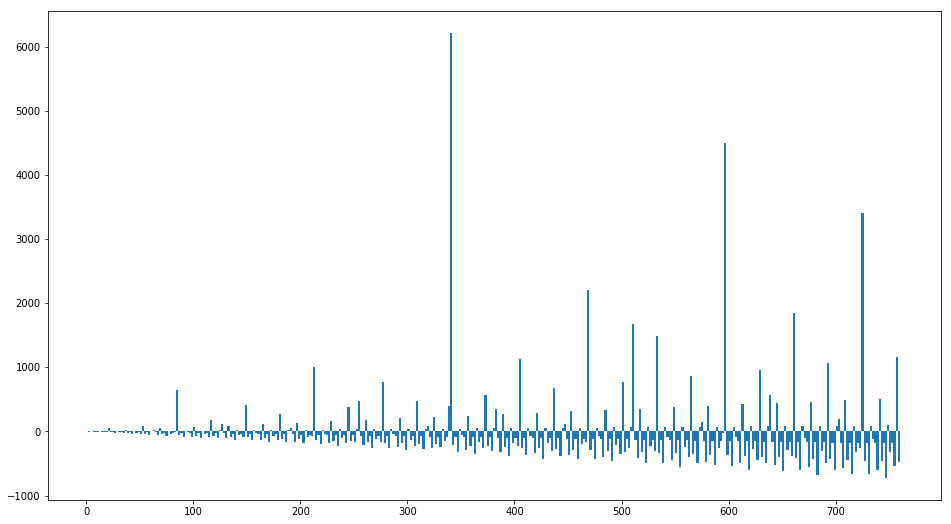

In [61]:
def plotWayPointDistances():
    X = []
    Y = []
    for i in range(1,380,1):
        p = 4*i + 1
        R = nextWayPoint([p])
        X.append(O(R[0][0]))
        Y.append(O(R[0][1]) - O(R[0][0]))
    plt.bar(X, Y, width=2)
    print(max(Y))
#
plotWayPointDistances()
# Note that negative values largely increase linearly with a consistent pattern
# positive values on the otherhand depend on counts of factors of 2, 3 or residues thereof.

# Dividing up 4N+1 numbers into groups with consistent behavior
- 4N+1    
    - 8N + 5    Five is O(3) which is where we start 
        - 16N + 5    
            - 32N + 5    
                - 64N + 5  __  Always '11110'
                - 64N + 37  __ often decreases 3(64i + 37) + 1 = 3*64i + 112 which is (2^4)(12i +7)   
            - 32N + 21  __ usually decreases.  3*(32*i + 21) + 1 = 96i + 64 which is (2^5)(3i +2)
        - 16N + 13    
            - 32N + 13 __ Always '1110'   
            - 32N + 29 __ often decreases.  3*(32*i + 29) + 1 = 96i + 88 which is (2^3)(12i + 11)
    - 8N + 1    
        - 16N + 1 __ Always '110'    
        - 16N + 9    
            - 32N + 9 __ Usually increases    
            - 32N + 25 __ Always '10110'    

In [62]:
def primeFactors(n):
    factors = []

    while n % 2 == 0: 
        factors.append(2)
        n = n // 2
          
    for i in range(3,int(math.sqrt(n))+1,2): 
        while n % i== 0: 
            factors.append(i) 
            n = n // i 
              
    # Condition if n is a prime 
    # number greater than 2 
    if n > 2: 
        factors.append(n) 
    return factors
#

In [63]:
primeFactors(3*64)

[2, 2, 2, 2, 2, 2, 3]

In [64]:
 primeFactors(341+1)

[2, 3, 3, 19]

In [65]:
 primeFactors(2*341-1)

[3, 227]

In [66]:
341%32

21

In [67]:
309%32

21

In [68]:
primeFactors(309+1)

[2, 5, 31]

In [69]:
primeFactors(2*309-1)

[617]

In [70]:
# 8*i + 5 numbers broken up into groups of consistency:

print("Odds of form: 64*i + 5")
for i in range(5):
    p = 64*i + 5
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )
#
print("")
print("Odds of form: 64*i + 37")
for i in range(5):
    p = 67*i + 37
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )
#

print("")
print("Odds of form: 32*i + 21")
for i in range(5):
    p = 32*i + 21
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )
#
print("")
print("Odds of form: 32*i + 13")
for i in range(5):
    p = 32*i + 13
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )
    
print("")
print("Odds of form: 32*i + 29")
for i in range(5):
    p = 32*i + 29
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )
    



Odds of form: 64*i + 5
[(3, 1), '11110', 30]
[(35, 7), '11110', 30]
[(67, 13), '11110', 30]
[(99, 19), '11110', 30]
[(131, 25), '11110', 30]

Odds of form: 64*i + 37
[(19, 9), '101011110', 350]
[(52, 7), '111', 7]
[(86, 129), '10', 2]
[(119, 135), '10101', 21]
[(153, 115), '110', 6]

Odds of form: 32*i + 21
[(11, 1), '1111110', 126]
[(27, 3), '111110', 62]
[(43, 1), '111111110', 510]
[(59, 9), '10111110', 190]
[(75, 9), '10101111110', 1406]

Odds of form: 32*i + 13
[(7, 3), '1110', 14]
[(23, 9), '1110', 14]
[(39, 15), '1110', 14]
[(55, 21), '1110', 14]
[(71, 27), '1110', 14]

Odds of form: 32*i + 29
[(15, 9), '101110', 46]
[(31, 27), '10101110', 174]
[(47, 27), '101110', 46]
[(63, 81), '1010101110', 686]
[(79, 45), '101110', 46]


In [71]:
nextWayPoint3([64000005])

[(64000005, 12000001), '11110', 30]

In [72]:
nextWayPoint3([32000021])

[(32000021, 1500001), '1111110', 126]

In [73]:
for i in range(6):
    p = 8*i + 9
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )

[(5, 9), '1010110', 86]
[(9, 7), '110', 6]
[(13, 15), '10110', 22]
[(17, 13), '110', 6]
[(21, 81), '10101010110', 1366]
[(25, 19), '110', 6]


In [74]:
for i in range(6):
    p = 16*i + 9
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )

[(5, 9), '1010110', 86]
[(13, 15), '10110', 22]
[(21, 81), '10101010110', 1366]
[(29, 33), '10110', 22]
[(37, 63), '1010110', 86]
[(45, 51), '10110', 22]


In [75]:
for i in range(6):
    p = 32*i + 9
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )

[(5, 9), '1010110', 86]
[(21, 81), '10101010110', 1366]
[(37, 63), '1010110', 86]
[(53, 135), '101010110', 342]
[(69, 117), '1010110', 86]
[(85, 729), '101010101010110', 21846]


In [76]:
for i in range(6):
    p = 32*i + 25
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )

[(13, 15), '10110', 22]
[(29, 33), '10110', 22]
[(45, 51), '10110', 22]
[(61, 69), '10110', 22]
[(77, 87), '10110', 22]
[(93, 105), '10110', 22]


In [77]:
for i in range(6):
    p = 16*i + 17
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )

[(9, 7), '110', 6]
[(17, 13), '110', 6]
[(25, 19), '110', 6]
[(33, 25), '110', 6]
[(41, 31), '110', 6]
[(49, 37), '110', 6]


In [78]:
for i in range(6):
    p = 16*i + 25
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )

[(13, 15), '10110', 22]
[(21, 81), '10101010110', 1366]
[(29, 33), '10110', 22]
[(37, 63), '1010110', 86]
[(45, 51), '10110', 22]
[(53, 135), '101010110', 342]


In [79]:
for i in range(6):
    p = 32*i + 25
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )

[(13, 15), '10110', 22]
[(29, 33), '10110', 22]
[(45, 51), '10110', 22]
[(61, 69), '10110', 22]
[(77, 87), '10110', 22]
[(93, 105), '10110', 22]


In [80]:
nextWayPoint3([32000025])

[(32000025, 36000029), '10110', 22]

In [81]:
for i in range(6):
    p = 32*i + 41
    R = nextWayPoint3([p])
    print([ (O(R[0][0]), O(R[0][1])), R[1], R[2] ] )

[(21, 81), '10101010110', 1366]
[(37, 63), '1010110', 86]
[(53, 135), '101010110', 342]
[(69, 117), '1010110', 86]
[(85, 729), '101010101010110', 21846]
[(101, 171), '1010110', 86]


# 4N + 1 Summary
We know 4N+1 numbers are tied together by possibly interleaved chains of 4N+3 and N/2 sequences.  Though there are special cases, in general it does not look like there is likely to be an a-priori formula for how long the chain between 4N+1 nodes will be given just the 4N+1 number.


# Next Steps
We have shown:
- 4N+3 sequences always terminate in a countable, predictable way
- The graph of Collatz numbers can be generated in integer order eliminating the concern that a number is not in the graph
- The Collatz graph can be simplified to the interconnected 4N+1 numbers which I called waypoints above
- Even numbers always lead to a lesser number by definition
- 4N+1 numbers always lead to a lesser number 3N+1 in three steps
- 4N+3 numbers always lead to a 4N+1 number in a countable number of steps

I don't know that I have shown convincingly that all paths in the graph lead to the smallest 4N+1 number: 1.

Since it has been proven that there are no trivial loops, sequences of 4N+1 numbers would either have to zig off to infinity or go to 1.  

If we could show that for any long 4N+3 run we will always find a sequence of 4N+3,4N+1,N/2 sequences that compensate for the long run, we would be done.  In practice we know this is true, how to prove it?


In [82]:
import networkx as nx

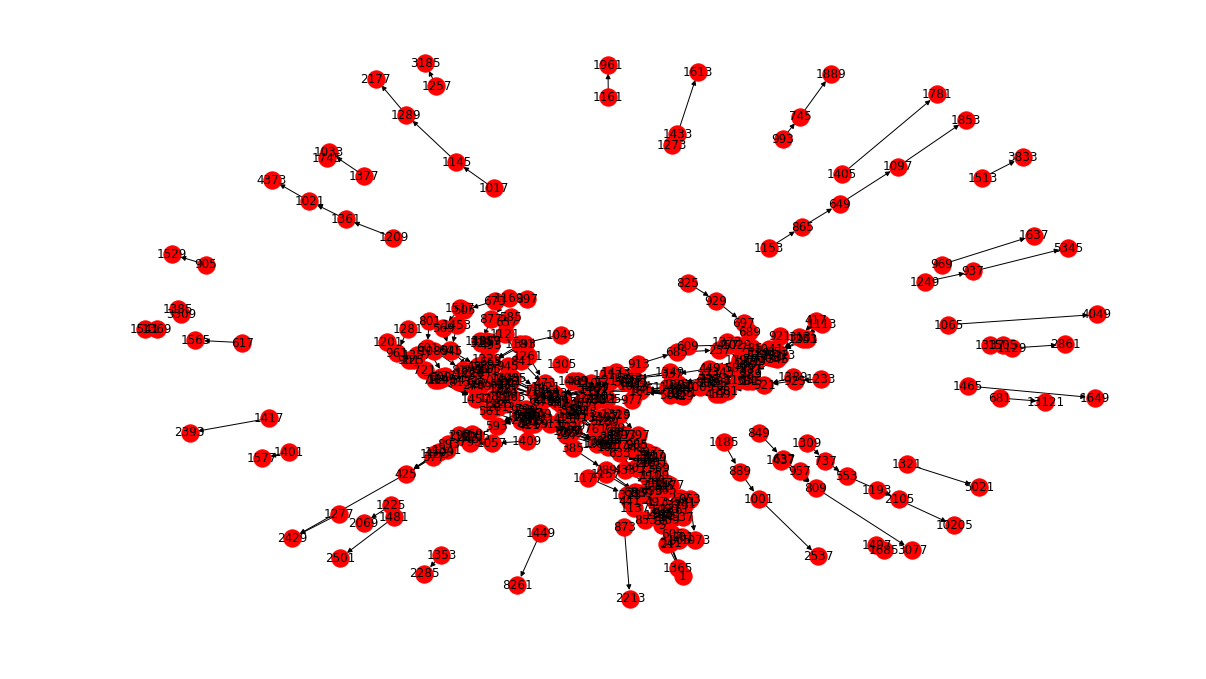

In [89]:
def Graph4NplusOnes():
    G=nx.DiGraph()
    node_labels = {}
    edge_labels = {}
    for i in range(1,380,1):
        p = 4*i + 1
        R = nextWayPoint([p])
        dist = O(R[0][1]) - O(R[0][0])
        node_name = str(p)
        node_name_next = str(R[0][1])
        # dups ignored which is what we want.
        node_labels[node_name] = node_name
        node_labels[node_name_next] = node_name_next
        G.add_node(node_name)
        G.add_node(node_name_next)
        G.add_edge(node_name, node_name_next)
        edge_labels[(node_name, node_name_next)] = R[1]
    # nx.draw_networkx_edge_labels(G, )
    pos = nx.spring_layout(G)
    nx.draw(G, pos, labels=node_labels)
#
Graph4NplusOnes()

In [98]:
def Graph2CSV():
    nodes = {}
    edges = {}
    for i in range(1,380,1):
        p = 4*i + 1
        R = nextWayPoint3([p])
        dist = O(R[0][1]) - O(R[0][0])
        node_name = str(p)
        node_name_next = str(R[0][1])
        # dups ignored which is what we want.
        nodes[node_name] = [node_name, node_name, '', str(p%64)]
        nodes[node_name_next] = [node_name_next, node_name_next, '', str(R[0][1]%64)]
        edges[(node_name, node_name_next)] = [node_name, node_name_next, 'Directed', str(len(edges)), R[1], '', '', str(dist)]
    with open("./collatz.gephi.nodes.csv", "w") as f:
        line = ','.join(['Id', 'Label', 'Interval', 'Mod64'])
        f.write(line)
        f.write('\n')
        for n in nodes:
            line = ','.join(nodes[n])
            f.write(line)
            f.write('\n')
    with open("./collatz.gephi.edges.csv", "w") as f:
        line = ','.join(['Source', 'Target', 'Type', 'Id', 'Label', 'Interval', 'Weight', 'Distance'])
        f.write(line)
        f.write('\n')
        for e in edges:
            line = ','.join(edges[e])
            f.write(line)
            f.write('\n')
#
Graph2CSV()